In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.1/267.1 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.8 MB/s eta 0:00:00


In [ ]:
!pip install lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.9/801.9 kB 15.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyli

In [ ]:
!pip install torchmetrics

In [ ]:
import zipfile
import os

# Define the path to the ZIP file you want to unzip
zip_file_path = '/content/drive/MyDrive/VocDataset.zip'

# Define the directory where you want to extract the files
extracted = './unzipped'

# Check if the ZIP file exists
if not os.path.exists(zip_file_path):
    print(f"Error: ZIP file '{zip_file_path}' not found.")
    exit()

# Check if the extraction directory exists; if not, create it
if not os.path.exists(extracted):
    os.makedirs(extracted)

# Extract the contents of the ZIP file
try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extracted)
    print("Extraction complete.")
except Exception as e:
    print(f"Error extracting ZIP file: {e}")

Extraction complete.


In [ ]:
import os
from PIL import Image
import torch
import torch.nn as nn
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision.transforms import Resize
import torch.nn.functional as F
from matplotlib.colors import ListedColormap
import torch.optim as optim
import wandb
from lightning.pytorch.loggers import WandbLogger
from lightning.pytorch.callbacks import ModelCheckpoint,EarlyStopping
import lightning as pl
import torchmetrics
!pip install monai
from monai.losses import DiceFocalLoss
wandb_logger = WandbLogger(log_model="all",project="VOCSegmentation",name='assignment_03_v17')
# Check if CUDA is available and choose the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
from torchvision.models.segmentation.deeplabv3 import DeepLabHead, DeepLabV3, ASPP

  Using cached monai-1.3.0-202310121228-py3-none-any.whl (1.3 MB)


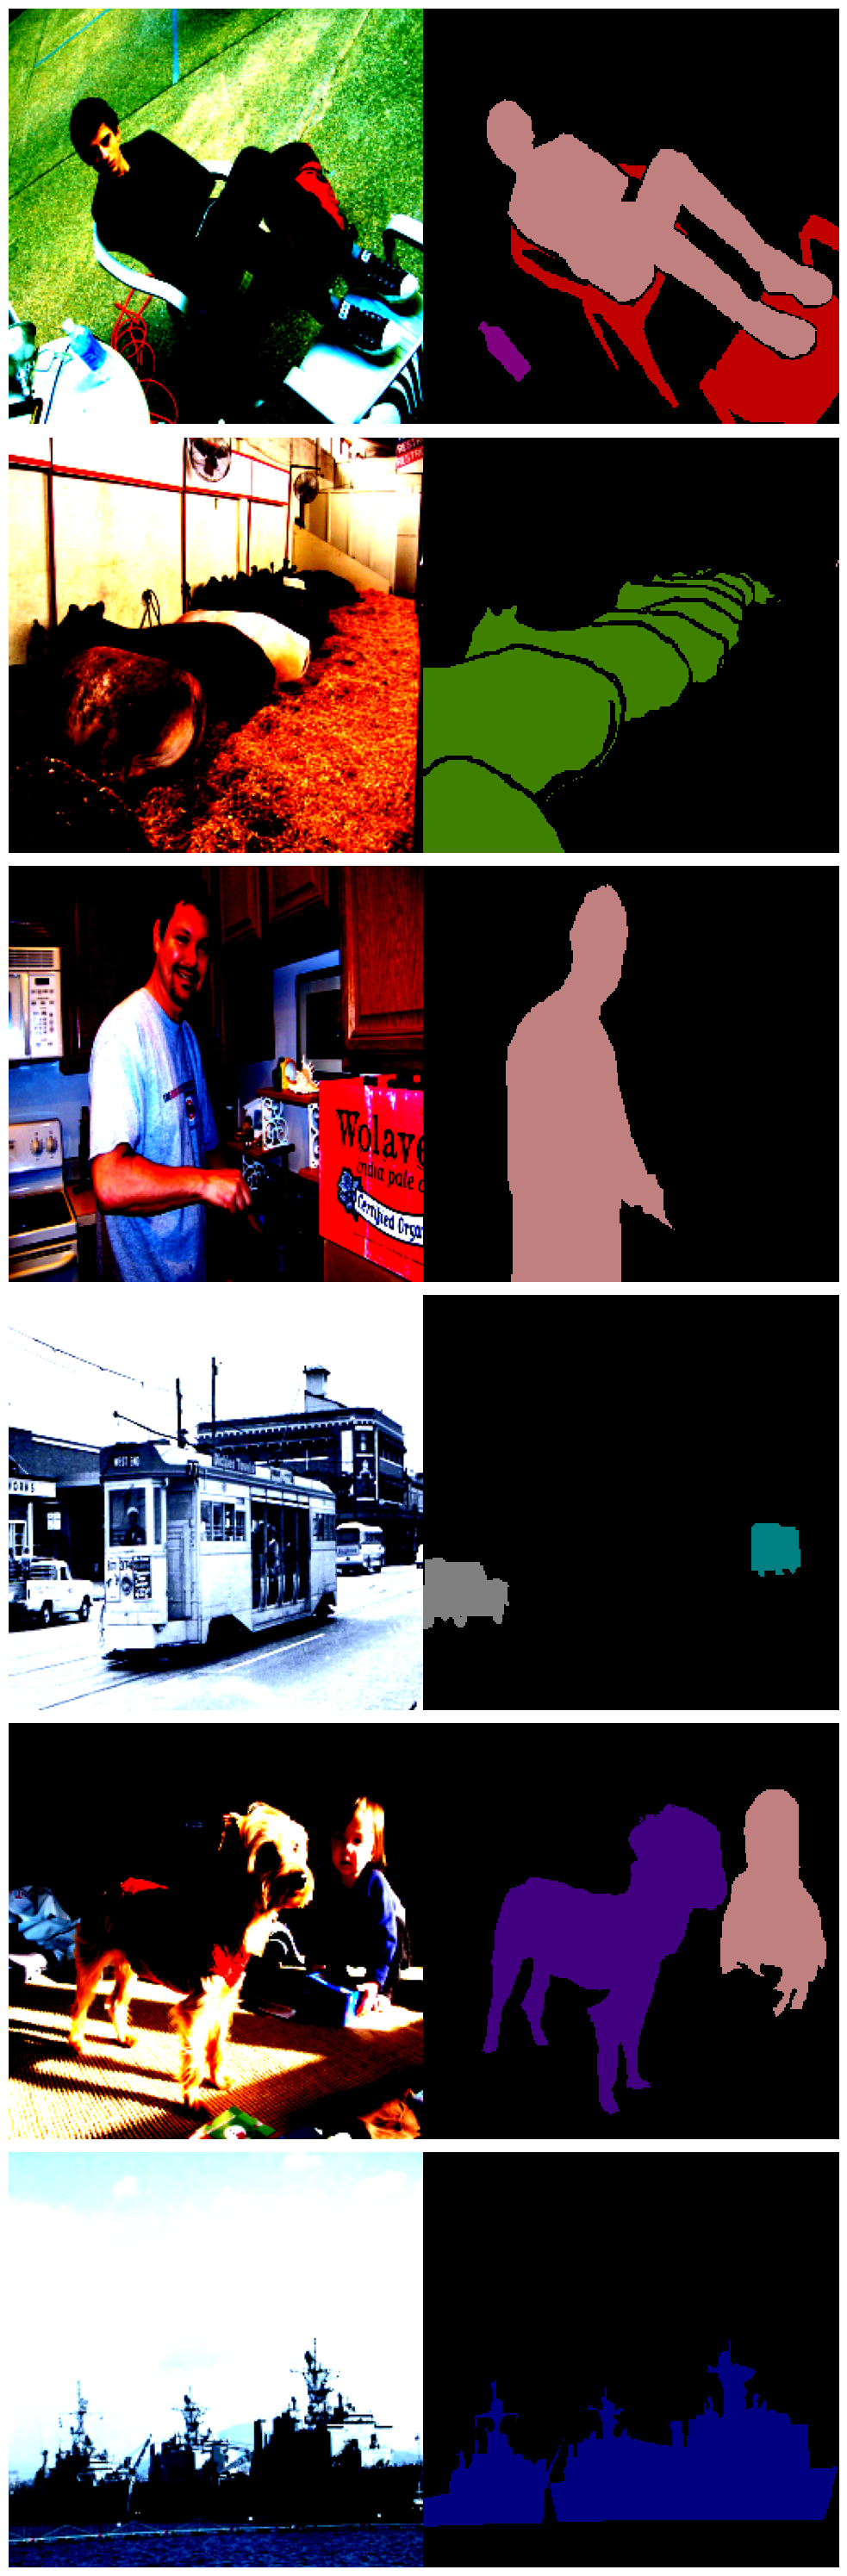

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth
100%|██████████| 233M/233M [00:03<00:00, 61.5MB/s]
INFO: GPU available: True 

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type          | Params
--------------------------------------------
0 | criterion | DiceFocalLoss | 0     
1 | deeplab   | DeepLabV3     | 61.0 M
--------------------------------------------
5.9 M     Trainable params
55.1 M    Non-trainable params
61.0 M    Total params
243.985   Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name      | Type          | Params
--------------------------------------------
0 | criterion | DiceFocalLoss | 0     
1 | deeplab   | DeepLabV3     | 61.0 M
--------------------------------------------
5.9 M     Trainable params
55.1 M    Non-trainable params
61.0 M    Total params
243.985   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 92: 'val/iou' reached 0.85480 (best 0.85480), saving model to '/content/checkpoints/best_model.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 92: 'val/iou' reached 0.85480 (best 0.85480), saving model to '/content/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 184: 'val/iou' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 184: 'val/iou' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 2, global step 276: 'val/iou' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 2, global step 276: 'val/iou' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 3, global step 368: 'val/iou' reached 0.86247 (best 0.86247), saving model to '/content/checkpoints/best_model.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 3, global step 368: 'val/iou' reached 0.86247 (best 0.86247), saving model to '/content/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 4, global step 460: 'val/iou' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 4, global step 460: 'val/iou' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 5, global step 552: 'val/iou' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 5, global step 552: 'val/iou' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 6, global step 644: 'val/iou' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 6, global step 644: 'val/iou' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 7, global step 736: 'val/iou' reached 0.86390 (best 0.86390), saving model to '/content/checkpoints/best_model.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 7, global step 736: 'val/iou' reached 0.86390 (best 0.86390), saving model to '/content/checkpoints/best_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 8, global step 828: 'val/iou' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 8, global step 828: 'val/iou' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 9, global step 920: 'val/iou' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 9, global step 920: 'val/iou' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 10, global step 1012: 'val/iou' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 10, global step 1012: 'val/iou' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 11, global step 1104: 'val/iou' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 11, global step 1104: 'val/iou' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 12, global step 1196: 'val/iou' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 12, global step 1196: 'val/iou' was not in top 1


In [ ]:
#dataset link : https://www.kaggle.com/datasets/sovitrath/voc-2012-segmentation-data
ALL_CLASSES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat',
    'chair', 'cow', 'dining table', 'dog', 'horse', 'motorbike', 'person', 'potted plant',
    'sheep', 'sofa', 'train', 'tv/monitor'
]

LABEL_COLORS_LIST = [
    [0, 0, 0], [128, 0, 0], [0, 128, 0], [128, 128, 0], [0, 0, 128], [128, 0, 128],
    [0, 128, 128], [128, 128, 128], [64, 0, 0], [192, 0, 0], [64, 128, 0], [192, 128, 0],
    [64, 0, 128], [192, 0, 128], [64, 128, 128], [192, 128, 128], [0, 64, 0], [128, 64, 0],
    [0, 192, 0], [128, 192, 0], [0, 64, 128]
]

jaccard = torchmetrics.JaccardIndex(task="multiclass",num_classes=len(ALL_CLASSES),average='weighted').to(device)

# Normalize colors to range [0, 1]
normalized_colors = [[r/255, g/255, b/255] for r, g, b in LABEL_COLORS_LIST]

# Create colormap
cmap = ListedColormap(normalized_colors)


class VOCDataSet(Dataset):
    def __init__(self, root_dir, dataset_type='train', transform=None):
        self.root_dir = root_dir
        self.transform = transform

        if dataset_type == 'train':
            self.image_folder = os.path.join(root_dir, 'train_images')
            self.label_folder = os.path.join(root_dir, 'train_labels')
        elif dataset_type == 'val':
            self.image_folder = os.path.join(root_dir, 'valid_images')
            self.label_folder = os.path.join(root_dir, 'valid_labels')
        else:
            raise ValueError("Invalid dataset_type. Use 'train' or 'val'.")

        self.image_list = os.listdir(self.image_folder)
        self.label_list = os.listdir(self.label_folder)
        # Sort images and labels
        self.image_list.sort()
        self.label_list.sort()

    # Convert RGB label to an integer label
    def rgb_to_integer(self,label_rgb):
        label_integer = np.zeros(label_rgb.shape[:2], dtype=np.uint8)
        for i, color in enumerate(LABEL_COLORS_LIST):
            mask = np.all(label_rgb == color, axis=-1)
            label_integer[mask] = i
        return label_integer

    def __len__(self):
        return len(self.image_list)

    #read image and mask for a single image and apply transform
    #be careful with applying transformations on the Mask (it should remain integer)
    def __getitem__(self, idx):
        img_name = os.path.join(self.image_folder, self.image_list[idx])
        label_name = os.path.join(self.label_folder, self.label_list[idx])
        image = Image.open(img_name)
        label = Image.open(label_name).convert('RGB')
        label_array = np.array(label)
        label_integer = self.rgb_to_integer(label_array)

        if self.transform:
            image = self.transform(image)

        imSize = self.transform.transforms[0].size[0]
        label_integer=(torch.tensor(label_integer).unsqueeze(0)).unsqueeze(0)
        label_integer = F.interpolate(label_integer, size=(imSize,imSize), mode='nearest').squeeze(0).squeeze(0).long() #only use NN

        return image, label_integer


# Define the transform
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create a train dataset object
train_dataset = VOCDataSet(root_dir='/content/unzipped/voc_2012_segmentation_data', dataset_type='train', transform=transform)
# Create a DataLoader for the train dataset
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Create a validation dataset object
val_dataset = VOCDataSet(root_dir='/content/unzipped/voc_2012_segmentation_data', dataset_type='val', transform=transform)
# Create a DataLoader for the train dataset
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)


# Get a batch of data & display it (just to see we correctly read the dataset!)
images, masks = next(iter(train_loader))
# Display the batch
fig, axs = plt.subplots(6, 2, figsize=(10, 30))
for i in range(6):
    # Display image
    axs[i, 0].imshow(images[i].permute(1, 2, 0))
    axs[i, 0].axis('off')
    #use NN to display exact
    axs[i, 1].imshow(np.squeeze(masks[i]),cmap=cmap,interpolation='nearest',vmin=0, vmax=len(ALL_CLASSES)-1)
    axs[i, 1].axis('off')
    #axs[i, 1].set_title('Mask')
plt.tight_layout()
plt.show(block=True)

class VOC_DeepLabV3(pl.LightningModule):
    def __init__(self, num_classes, learning_rate=0.0013116504133594993, unfreeze_last_n_layers=0):
        super(VOC_DeepLabV3, self).__init__()
        self.learning_rate = learning_rate
        self.criterion = DiceFocalLoss()

        # Load DeepLabV3++ model with ResNet-101 backbone
        self.deeplab = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained='DEFAULT')

        # Freeze all parameters except last layers
        if unfreeze_last_n_layers > 0:
            for param in self.deeplab.parameters():
                param.requires_grad = False
            for param in self.deeplab.backbone.layer2[-unfreeze_last_n_layers:].parameters():
                param.requires_grad = True
            for param in self.deeplab.backbone.layer3[-unfreeze_last_n_layers:].parameters():
                param.requires_grad = True
            for param in self.deeplab.backbone.layer4[-unfreeze_last_n_layers:].parameters():
                param.requires_grad = True

    def forward(self, x):
        return self.deeplab(x)['out']

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        # Calculate loss including background class
        targets_one_hot = torch.nn.functional.one_hot(y, num_classes=21)
        targets_one_hot = targets_one_hot.permute(0, 3, 1,2)
        softmaxed_logits = torch.softmax(logits, dim=1)  # Apply softmax along the class dimension
        loss=self.criterion(softmaxed_logits,targets_one_hot)
        # Get the integer mask by taking the argmax along the class dimension
        predicted_mask = torch.argmax(softmaxed_logits, dim=1)

        iou=jaccard(predicted_mask, y)
        self.log('train/loss', loss,on_epoch=True,on_step=True,prog_bar=True)
        self.log('train/iou', iou,on_epoch=True,on_step=True,prog_bar=True)

        if(batch_idx==0):
             #Display the batch
            fig, axs = plt.subplots(6, 3, figsize=(10, 30))
            for i in range(6):
                # Display image
                axs[i, 0].imshow(x[i].cpu().detach().permute(1, 2, 0),vmin=torch.min(x[i]),vmax=torch.max(x[i]))
                axs[i, 0].axis('off')
                # Display mask
                #use NN to display exact
                axs[i, 1].imshow(y[i].cpu().detach(),cmap=cmap,interpolation='nearest',vmin=0, vmax=len(ALL_CLASSES)-1)
                axs[i, 1].axis('off')

                axs[i, 2].imshow(predicted_mask[i].cpu().detach(),cmap=cmap,interpolation='nearest',vmin=0, vmax=len(ALL_CLASSES)-1)
                axs[i, 2].axis('off')
            plt.tight_layout()
            fig = plt.gcf()
            fig.canvas.draw()
            data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
            data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
            plt.close()
            # Log images
            wandb_logger.log_image(key="Train_Images", images=[data],caption=[f"Image-{self.trainer.current_epoch}"])
        return loss
    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        # Calculate loss including background class
        targets_one_hot = torch.nn.functional.one_hot(y, num_classes=21)
        targets_one_hot = targets_one_hot.permute(0, 3, 1,2)
        softmaxed_logits = torch.softmax(logits, dim=1)  # Apply softmax along the class dimension
        loss=self.criterion(softmaxed_logits,targets_one_hot)
        # Get the integer mask by taking the argmax along the class dimension
        predicted_mask = torch.argmax(softmaxed_logits, dim=1)
        iou=jaccard(predicted_mask, y)
        self.log('val/loss', loss,on_epoch=True,on_step=True,prog_bar=True)
        self.log('val/iou', iou,on_epoch=True,on_step=True,prog_bar=True)

        if(batch_idx==0):
             #Display the batch
            fig, axs = plt.subplots(6, 3, figsize=(10, 30))
            for i in range(6):
                # Display image
                axs[i, 0].imshow(x[i].cpu().detach().permute(1, 2, 0),vmin=torch.min(x[i]),vmax=torch.max(x[i]))
                axs[i, 0].axis('off')
                # Display mask
                #use NN to display exact
                axs[i, 1].imshow(y[i].cpu().detach(),cmap=cmap,interpolation='nearest',vmin=0, vmax=len(ALL_CLASSES)-1)
                axs[i, 1].axis('off')

                axs[i, 2].imshow(predicted_mask[i].cpu().detach(),cmap=cmap,interpolation='nearest',vmin=0, vmax=len(ALL_CLASSES)-1)
                axs[i, 2].axis('off')
            plt.tight_layout()


            fig = plt.gcf()
            fig.canvas.draw()
            data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
            data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))

            plt.close()

            # Log images
            wandb_logger.log_image(key="Val_Images", images=[data],caption=[f"Image-{self.trainer.current_epoch}"])

        return loss
    def configure_optimizers(self):
        optimizer = optim.AdamW(filter(lambda p: p.requires_grad, self.parameters()),lr=self.learning_rate,betas=(0.95, 0.999),eps=1e-6,weight_decay=0.08974848425820392)
        return optimizer

    def configure_callbacks(self):
        """Configures the ModelCheckpoint callback."""
        checkpoint_callback = ModelCheckpoint(
            monitor='val/iou',
            dirpath='./checkpoints',  # Directory to save checkpoints
            filename='best_model',  # Filename pattern
            save_top_k=1,  # Save only the best model
            mode='max',
            verbose=True
        )
        early_stopping_callback = EarlyStopping(
            monitor='val/iou',
            patience=5,
            mode='max'
        )
        return [checkpoint_callback,early_stopping_callback]


# Initialize the model with class weights
model = VOC_DeepLabV3(num_classes=21, learning_rate=0.0013116504133594993, unfreeze_last_n_layers=1)
callbacks = model.configure_callbacks()

trainer = pl.Trainer(logger=wandb_logger,max_epochs=50, devices=1, accelerator="auto",callbacks=callbacks)

trainer.fit(model, train_dataloaders=train_loader, val_dataloaders=val_loader)
